## Pandas DataFrames

Pandas uses data frames to represent data. Data frames are like spreadsheets or database tables. 

<img src="./images/01_table_dataframe.svg" width="300">

The simplest filetypes to deal with are `csv` but ... we won't always have that luxury. So I will start by showing you how to load a csv file into a dataFrame, and then show a few methods that work on dataFrames. I will then use a json data file that has the same data, but in a "not so friendly" format. I previously converted it to the csv for this example, but I think understanding what a dataFrame expects a python dictionary to be formatted like in order to be read correctly could be really helpful.


### CSV Example

First thing is to import the correct libraries:

In [5]:
import pandas as pd      # the necessary library
from rich import print   # extra python package to giove std output colorful and more readable

Now we can read in the appropriate csv file in just a couple of lines of code.

In [11]:
csvData = pd.read_csv("cities_latlon_w_pop_v2.csv")
cityDf = pd.DataFrame(csvData)

print(cityDf)

rank         state          city   latitude   longitude  population  \
0       1      New York      New York  40.712784  -74.005941     8405837   
1       2    California   Los Angeles  34.052234 -118.243685     3884307   
2       3      Illinois       Chicago  41.878114  -87.629798     2718782   
3       4         Texas       Houston  29.760427  -95.369803     2195914   
4       5  Pennsylvania  Philadelphia  39.952584  -75.165222     1553165   
..    ...           ...           ...        ...         ...         ...   
995   998          Utah  Spanish Fork  40.114955 -111.654923       36956   
996   999     Wisconsin        Beloit  42.508348  -89.031776       36888   
997  1000       Florida   Panama City  30.158813  -85.660206       36877   
998    63        Alaska     Anchorage  61.218056 -149.900278      300950   
999    54        Hawaii      Honolulu  21.306944 -157.858333      347884   

     growth  
0       4.8  
1       4.8  
2      -6.1  
3      11.0  
4       2.6  
..      ...  
995    78.1  
996     2.9  
997     0.1  
998    15.4  
999    -6.2  

[1000 rows x 7 columns]

### Head() and Tail Methods

To see the first 8 and last 3 rows of a pandas dataFrame:

In [14]:
cityDf.head(8)

,rank,state,city,latitude,longitude,population,growth
997,1000,Florida,Panama City,30.158813,-85.660206,36877,0.1
998,63,Alaska,Anchorage,61.218056,-149.900278,300950,15.4
999,54,Hawaii,Honolulu,21.306944,-157.858333,347884,-6.2


In [15]:
cityDf.tail(3)

,rank,state,city,latitude,longitude,population,growth
997,1000,Florida,Panama City,30.158813,-85.660206,36877,0.1
998,63,Alaska,Anchorage,61.218056,-149.900278,300950,15.4
999,54,Hawaii,Honolulu,21.306944,-157.858333,347884,-6.2


In [16]:
# A check on how pandas interpreted each of the column data types can be done by requesting the pandas dtypes attribute:

cityDf.dtypes

rank            int64
state          object
city           object
latitude      float64
longitude     float64
population      int64
growth        float64
dtype: object

In [17]:
cityDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rank        1000 non-null   int64  
 1   state       1000 non-null   object 
 2   city        1000 non-null   object 
 3   latitude    1000 non-null   float64
 4   longitude   1000 non-null   float64
 5   population  1000 non-null   int64  
 6   growth      1000 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


### Filtering Columns

<img src="./images/03_subset_columns.svg" width="300">

In [20]:
states = cityDf["state"]
print(states)

0          New York
1        California
2          Illinois
3             Texas
4      Pennsylvania
           ...     
995            Utah
996       Wisconsin
997         Florida
998          Alaska
999          Hawaii
Name: state, Length: 1000, dtype: object

In [23]:
rank_states = cityDf[['rank','state']]
print(rank_states)

rank         state
0       1      New York
1       2    California
2       3      Illinois
3       4         Texas
4       5  Pennsylvania
..    ...           ...
995   998          Utah
996   999     Wisconsin
997  1000       Florida
998    63        Alaska
999    54        Hawaii

[1000 rows x 2 columns]

### Filtering Rows

We can also filter rows in a data frame. Below is a simple example, but notice the results:

In [27]:
big = cityDf["population"] > 1500000

print(big)

0       True
1       True
2       True
3       True
4       True
       ...  
995    False
996    False
997    False
998    False
999    False
Name: population, Length: 1000, dtype: bool

It gives simply a result of true or false for every row in the dataFrame. If you want to see the actual results, you can do the following:

In [28]:

big = cityDf[cityDf["population"] > 1500000]

print(big)

rank         state          city   latitude   longitude  population  growth
0     1      New York      New York  40.712784  -74.005941     8405837     4.8
1     2    California   Los Angeles  34.052234 -118.243685     3884307     4.8
2     3      Illinois       Chicago  41.878114  -87.629798     2718782    -6.1
3     4         Texas       Houston  29.760427  -95.369803     2195914    11.0
4     5  Pennsylvania  Philadelphia  39.952584  -75.165222     1553165     2.6
5     6       Arizona       Phoenix  33.448377 -112.074037     1513367    14.0

## Plotting DataFrames

- https://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/understand-df-plot-in-pandas/
- https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html#

<AxesSubplot:xlabel='population', ylabel='growth'>

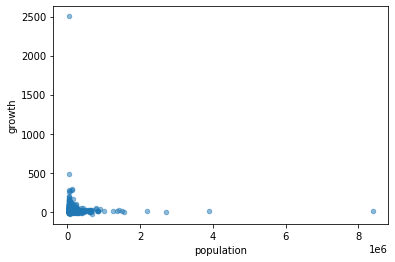

In [41]:
import matplotlib.pyplot as plt

#cityDf.plot(x='population', y='rank',kind='bar')
cityDf.plot.scatter(x="rank", y="growth", alpha=0.5)


To manually store data in a table, create a DataFrame. When using a Python dictionary of lists, the dictionary keys will be used as column headers and the values in each list as columns of the DataFrame. See below.

In [3]:
df = pd.DataFrame(
    {
        "Name": [
            "Braund, Mr. Owen Harris",
            "Allen, Mr. William Henry",
            "Bonnell, Miss. Elizabeth",
        ],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"],
    }
)

print(df)

Name  Age     Sex
0   Braund, Mr. Owen Harris   22    male
1  Allen, Mr. William Henry   35    male
2  Bonnell, Miss. Elizabeth   58  female

This isn't always convenient. Most data isn't typically stored this way, but get used to it. Data frames are extremely popular across multiple libraries. Let's convert 